In [594]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import csv
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from statistics import mode 

# Read CSV file stored in the desktop

In [595]:
df = pd.read_csv('/Users/macbook/Desktop/AAAI.csv')

In [596]:
data=pd.DataFrame(df)

In [597]:
df.columns = ['Title','Keywords','Topics','High_Level_Keywords','Abstract']

In [598]:
data

,Title,Keywords,Topics,High_Level_Keywords,Abstract
0,The cascade auction – a mechanism for deterrin...,Mediators\nAuctions\nCollusion\nAd Exchanges,Auctions and Market-Based Systems\nE-Commerce\...,Multiagent Systems,We introduce a sealed bid auction of a single ...
1,Basis Adaptation for Sparse Nonlinear Reinforc...,Reinforcement learning\nSparsity\nMirror desce...,Dimension Reduction/Feature Selection\nOnline ...,Machine Learning,This paper presents a new approach to basis ad...
2,Optimal Coalition Structures in Cooperative Gr...,Cooperative Game Theory\nCoalition Structure G...,Coordination and Collaboration\nGame Theory,Multiagent Systems,Representation languages for coalitional game...
3,External Memory Best-First Search for Multiple...,External-Memory Search\nParallel Search\nMulti...,Heuristic Search\nEvaluation and Analysis (Sea...,Heuristic Search and Optimization,Multiple sequence alignment (MSA) is a central...
4,Posted Prices Exchange for Display Advertising...,Display Advertising\nDynamic Pricing\nMarket E...,Auctions and Market-Based Systems\nE-Commerce\...,Multiagent Systems,We propose a new market design for display adv...
5,Gradient Networks for Shape-Based Object Insta...,object detection\ninstance detection\nshape\ng...,"Vision, Object Recognition, and Perception",Robotics,We present a novel framework for shape-based t...
6,Unified Constraint Propagation on Multi-View Data,pairwise constraint propagation\nsemi-supervis...,Relational/Graph-Based Learning\nSemisupervise...,Machine Learning,This paper presents a unified framework for in...
7,Progression of Decomposed Situation Calculus T...,reasoning about actions\ndecomposition of logi...,"Action, Change, and Causality",Knowledge Representation and Reasoning,In many tasks related to reasoning about conse...
8,How to Cut a Cake Before the Party Ends,Cake cutting\nFair division\nComputational soc...,Mechanism Design\nSocial Choice / Voting,Multiagent Systems,For decades researchers have struggled with th...
9,Reciprocal Hash Tables for Nearest Neighbor Se...,locality sensitive hashing\nnearest neighbor s...,Search (General/Other)\nInformation Retrieval\...,Machine Learning,Recent years have witnessed the success of has...


# Preprocessing of the data(Removing the Stopwords)

In [599]:
data1=[]
stop_words=set(stopwords.words("english"))
for i in range(0,len(data.Topics)):
    word1 = word_tokenize(data.Topics[i])
    word2 = word_tokenize(data.High_Level_Keywords[i])
    word3 = word1 + word2 
    filtered_words=[]
    for word in word3:
        if word not in stop_words:
            filtered_words.append(word)
    data1.append(filtered_words)

# Function to calculate the Jaccard Coefficient

In [600]:
def jaccard_coeff(list1,list2):
    p=len(set(list1+list2))
    nset1=len(set(list1))
    nset2=len(set(list2))
    return float(nset1+nset2-p)/float(p)

# Example to demonstrate Jaccard Coefficient

In [601]:
a=['Machine_Learning','Supervised']
b=['Machine_Learning','Unsupervised']
jaccard_coeff(a,b)

0.3333333333333333

In [602]:
jaccard_coeff(data1[0],data1[0])

1.0

In [603]:
len(set(data1[0]))

9

In [604]:
jaccard_coeff(data1[0],data1[0])

1.0

In [605]:
similarity_mat = np.empty((len(data1),len(data1)))
for i in range(0,len(data1)):
    for j in range(0,len(data1)):
        similarity_mat[i][j]=jaccard_coeff(data1[i],data1[j])

In [606]:
import seaborn as sns
import matplotlib.pyplot as plt


In [607]:
similarity_mat   #a similarity matrix between different Research Papers

array([[1.        , 0.        , 0.36363636, ..., 0.        , 0.        ,
        0.04545455],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.09090909],
       [0.36363636, 0.        , 1.        , ..., 0.        , 0.        ,
        0.05263158],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.85714286,
        0.17647059],
       [0.        , 0.        , 0.        , ..., 0.85714286, 1.        ,
        0.16666667],
       [0.04545455, 0.09090909, 0.05263158, ..., 0.17647059, 0.16666667,
        1.        ]])

# Similarity Heatmap for all the Research Papers(symmetric along the diagonal)

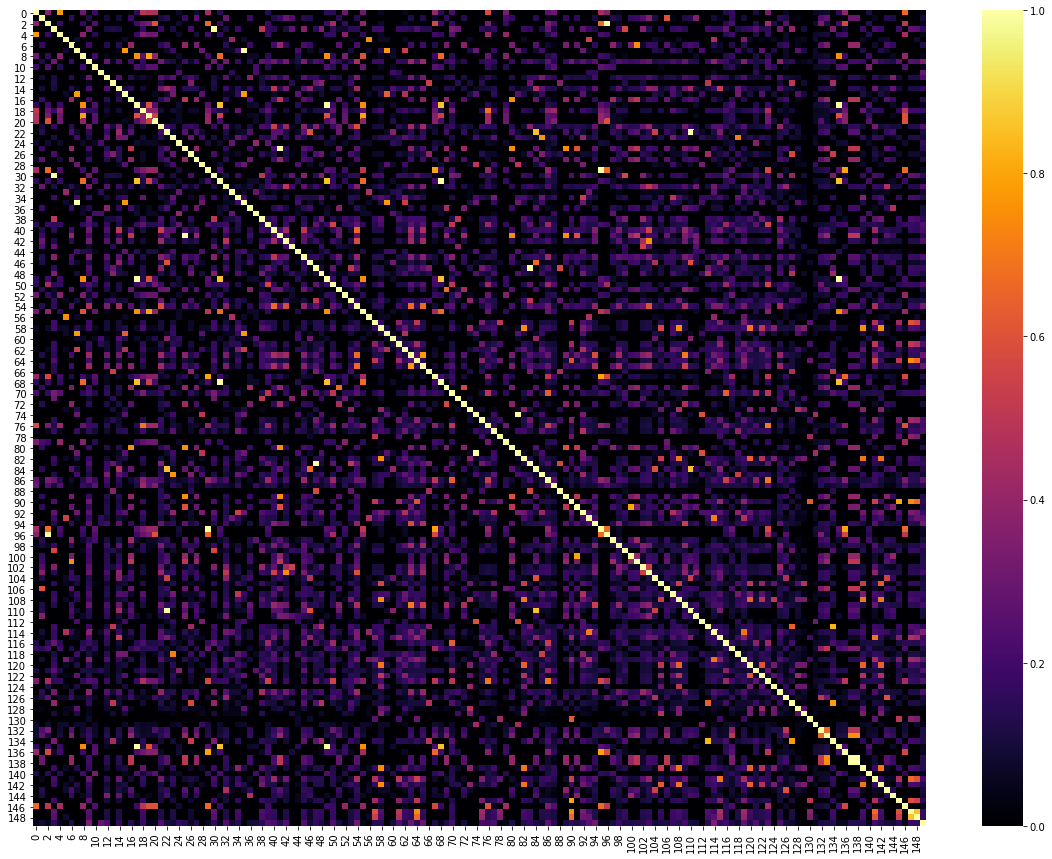

In [608]:
plt.figure(figsize=(20, 15))
sns.heatmap(similarity_mat, annot=False, fmt="g", cmap='inferno')
plt.show()

In [609]:
len(similarity_mat[1])

150

In [610]:
type(similarity_mat)

numpy.ndarray

# Function to calculate the index of the largest coefficient of the matrix

In [611]:
def max_element(similarity_mat):
    maxima=0
    for i in range(0,len(similarity_mat)):
        for j in range(i+1,len(similarity_mat[i])):
            if(similarity_mat[i][j]>=maxima and j<len(similarity_mat)):
                maxima=similarity_mat[i][j]
                I=i
                J=j
            j=j+1
        i=i+1
    return maxima,I,J

In [612]:
max_element(similarity_mat)

(1.0, 137, 138)

In [613]:
def min_ele(i,j):  # Complete Linkage(Considers the most unlinked points)
    if(i>=j):
        return j
    else:
        return i

# Function to update the similarity matrix by Complete Linkage

In [614]:
def new_mat(sim_mat,header):
    p=max_element(sim_mat)
    sim_mat1=np.array(sim_mat)    
    new_col=np.zeros(len(sim_mat)+1)
    new_row=np.zeros(len(sim_mat))
    
    for i in range(0,len(sim_mat)):
        new_col[i] = min_ele(sim_mat[i][p[1]],sim_mat[i][p[2]]) #Complete Linkage Strategy
    new_col[len(sim_mat)] = 1

    for i in range(0,len(sim_mat)):
        new_row[i] = min_ele(sim_mat[p[1]][i],sim_mat[p[2]][i]) #Complete Linkage Strategy
         
    new_row=np.reshape(new_row,(1,len(sim_mat)))
    new_col=np.reshape(new_col,(len(sim_mat)+1,1))
    
    sim_mat = np.append(sim_mat, new_row , axis=0)
    sim_mat = np.append(sim_mat, new_col, axis=1)
    
    sim_mat = np.delete(sim_mat, np.s_[p[1]:p[1]+1] , axis = 0)
    sim_mat = np.delete(sim_mat, np.s_[p[2]-1:p[2]] , axis = 0)
    sim_mat = np.delete(sim_mat, np.s_[p[1]:p[1]+1] , axis = 1)
    sim_mat = np.delete(sim_mat, np.s_[p[2]-1:p[2]] , axis = 1)

    m=header[p[1]]
    n=header[p[2]]
    del header[p[1]]
    del header[p[2]-1]
    header.append([m,n])
    return sim_mat,header

In [615]:
header=[i for i in range(0,150)]

In [616]:
g=similarity_mat
h=header
while(len(h)>9):
    f=new_mat(g,h)
    g=f[0]
    h=f[1]

# Prints the Clusters

In [617]:
for i in h:
    print("\nCluster \n ",i)


Cluster 
  [60, [14, [104, [46, [84, [22, 110]]]]]]

Cluster 
  [[75, [[[90, 145], [64, [147, 148]]], [61, [115, 141]]]], [130, [57, 78]]]

Cluster 
  [[48, [99, [3, 30]]], [[43, 102], [38, 71]]]

Cluster 
  [[[13, 66], [26, [127, [113, 134]]]], [53, [88, [47, 83]]]]

Cluster 
  [[11, 149], [121, [24, 37]]]

Cluster 
  [[[[19, 55], [8, [[31, 68], [17, [49, 135]]]]], [10, 140]], [[[86, 123], [[70, 116], [39, 50]]], [87, [[[20, [2, 96]], [146, [67, [136, [29, 95]]]]], [[52, 79], [[0, 4], [18, 76]]]]]]]

Cluster 
  [[[1, 106], [117, [132, [133, [137, 138]]]]], [[12, [36, 144]], [[[9, 125], [[45, [[54, [63, 65]], [21, 40]]], [98, [94, 109]]]], [[111, [32, [42, 103]]], [[126, 143], [[97, [6, 101]], [[72, [51, 69]], [27, [[91, 100], [[89, [25, 41]], [16, 80]]]]]]]]]]]

Cluster 
  [[131, [28, [112, [74, 81]]]], [44, [[62, [15, [59, [7, 35]]]], [[118, [23, 85]], [77, [107, [34, 92]]]]]]]

Cluster 
  [[[119, [93, 114]], [33, [5, 56]]], [[122, [105, [120, [82, [108, [139, [58, 142]]]]]]], [129,

# NMI Calculation

In [618]:
def fun(h,p):
    if(type(h[0])==int):
        p.append(h[0])
    else:
        fun(h[0],p)
    if(type(h[1])==int):
        p.append(h[1])
    else:
        fun(h[1],p)

In [619]:
x=150 
nmi = 0
for i in range(0,len(h)):   #To open up the clusters by removing bracket(There are brackets in the clusters above)
    p=[]
    fun(h[i],p)
    q=[]
    for j in range(0,len(p)):
        q.append(data.High_Level_Keywords[p[j]])
    nmi=nmi+(1/x)*q.count(mode(q))   #NMI Calculation

In [620]:
nmi

0.9333333333333332